In [1]:
import pandas as pd
dhr=pd.read_csv("HR-Employee-Attrition.csv")

In [2]:
dhr.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [3]:
#Checking the datatypes of the columns
dhr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

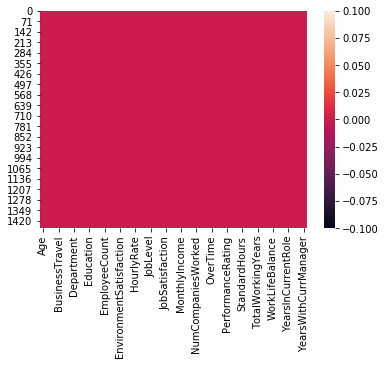

In [4]:
#Checking the null values
import seaborn as sns
sns.heatmap(dhr.isnull())

In [5]:
#checking the shape
dhr.shape

(1470, 35)

In [6]:
# Checking the column data so that if it is only one type of value we can drop the data
dhr['EmployeeCount'].value_counts()


1    1470
Name: EmployeeCount, dtype: int64

In [7]:
#since same type of value present it wont be adding any value to our classification models
dhr['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [8]:
#since same type of value present it wont be adding any value to our classification models
dhr.Over18.value_counts()

Y    1470
Name: Over18, dtype: int64

In [9]:
dhr.drop("EmployeeCount",axis=1,inplace=True)
dhr.drop("StandardHours",axis=1,inplace=True)
dhr.drop("Over18",axis=1,inplace=True)

In [10]:
dhr.shape

(1470, 32)

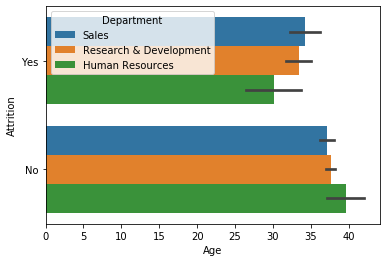

In [11]:
import seaborn as sns
sns.barplot(x="Age",y="Attrition",hue="Department",data=dhr)

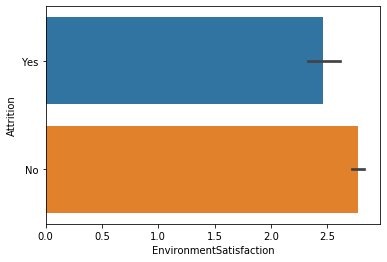

In [12]:
sns.barplot(x="EnvironmentSatisfaction",y="Attrition",data=dhr)

In [13]:
#As datatype is object we are using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in dhr.columns:
    if dhr[col].dtype==object:
        dhr[col]=le.fit_transform(dhr[col])

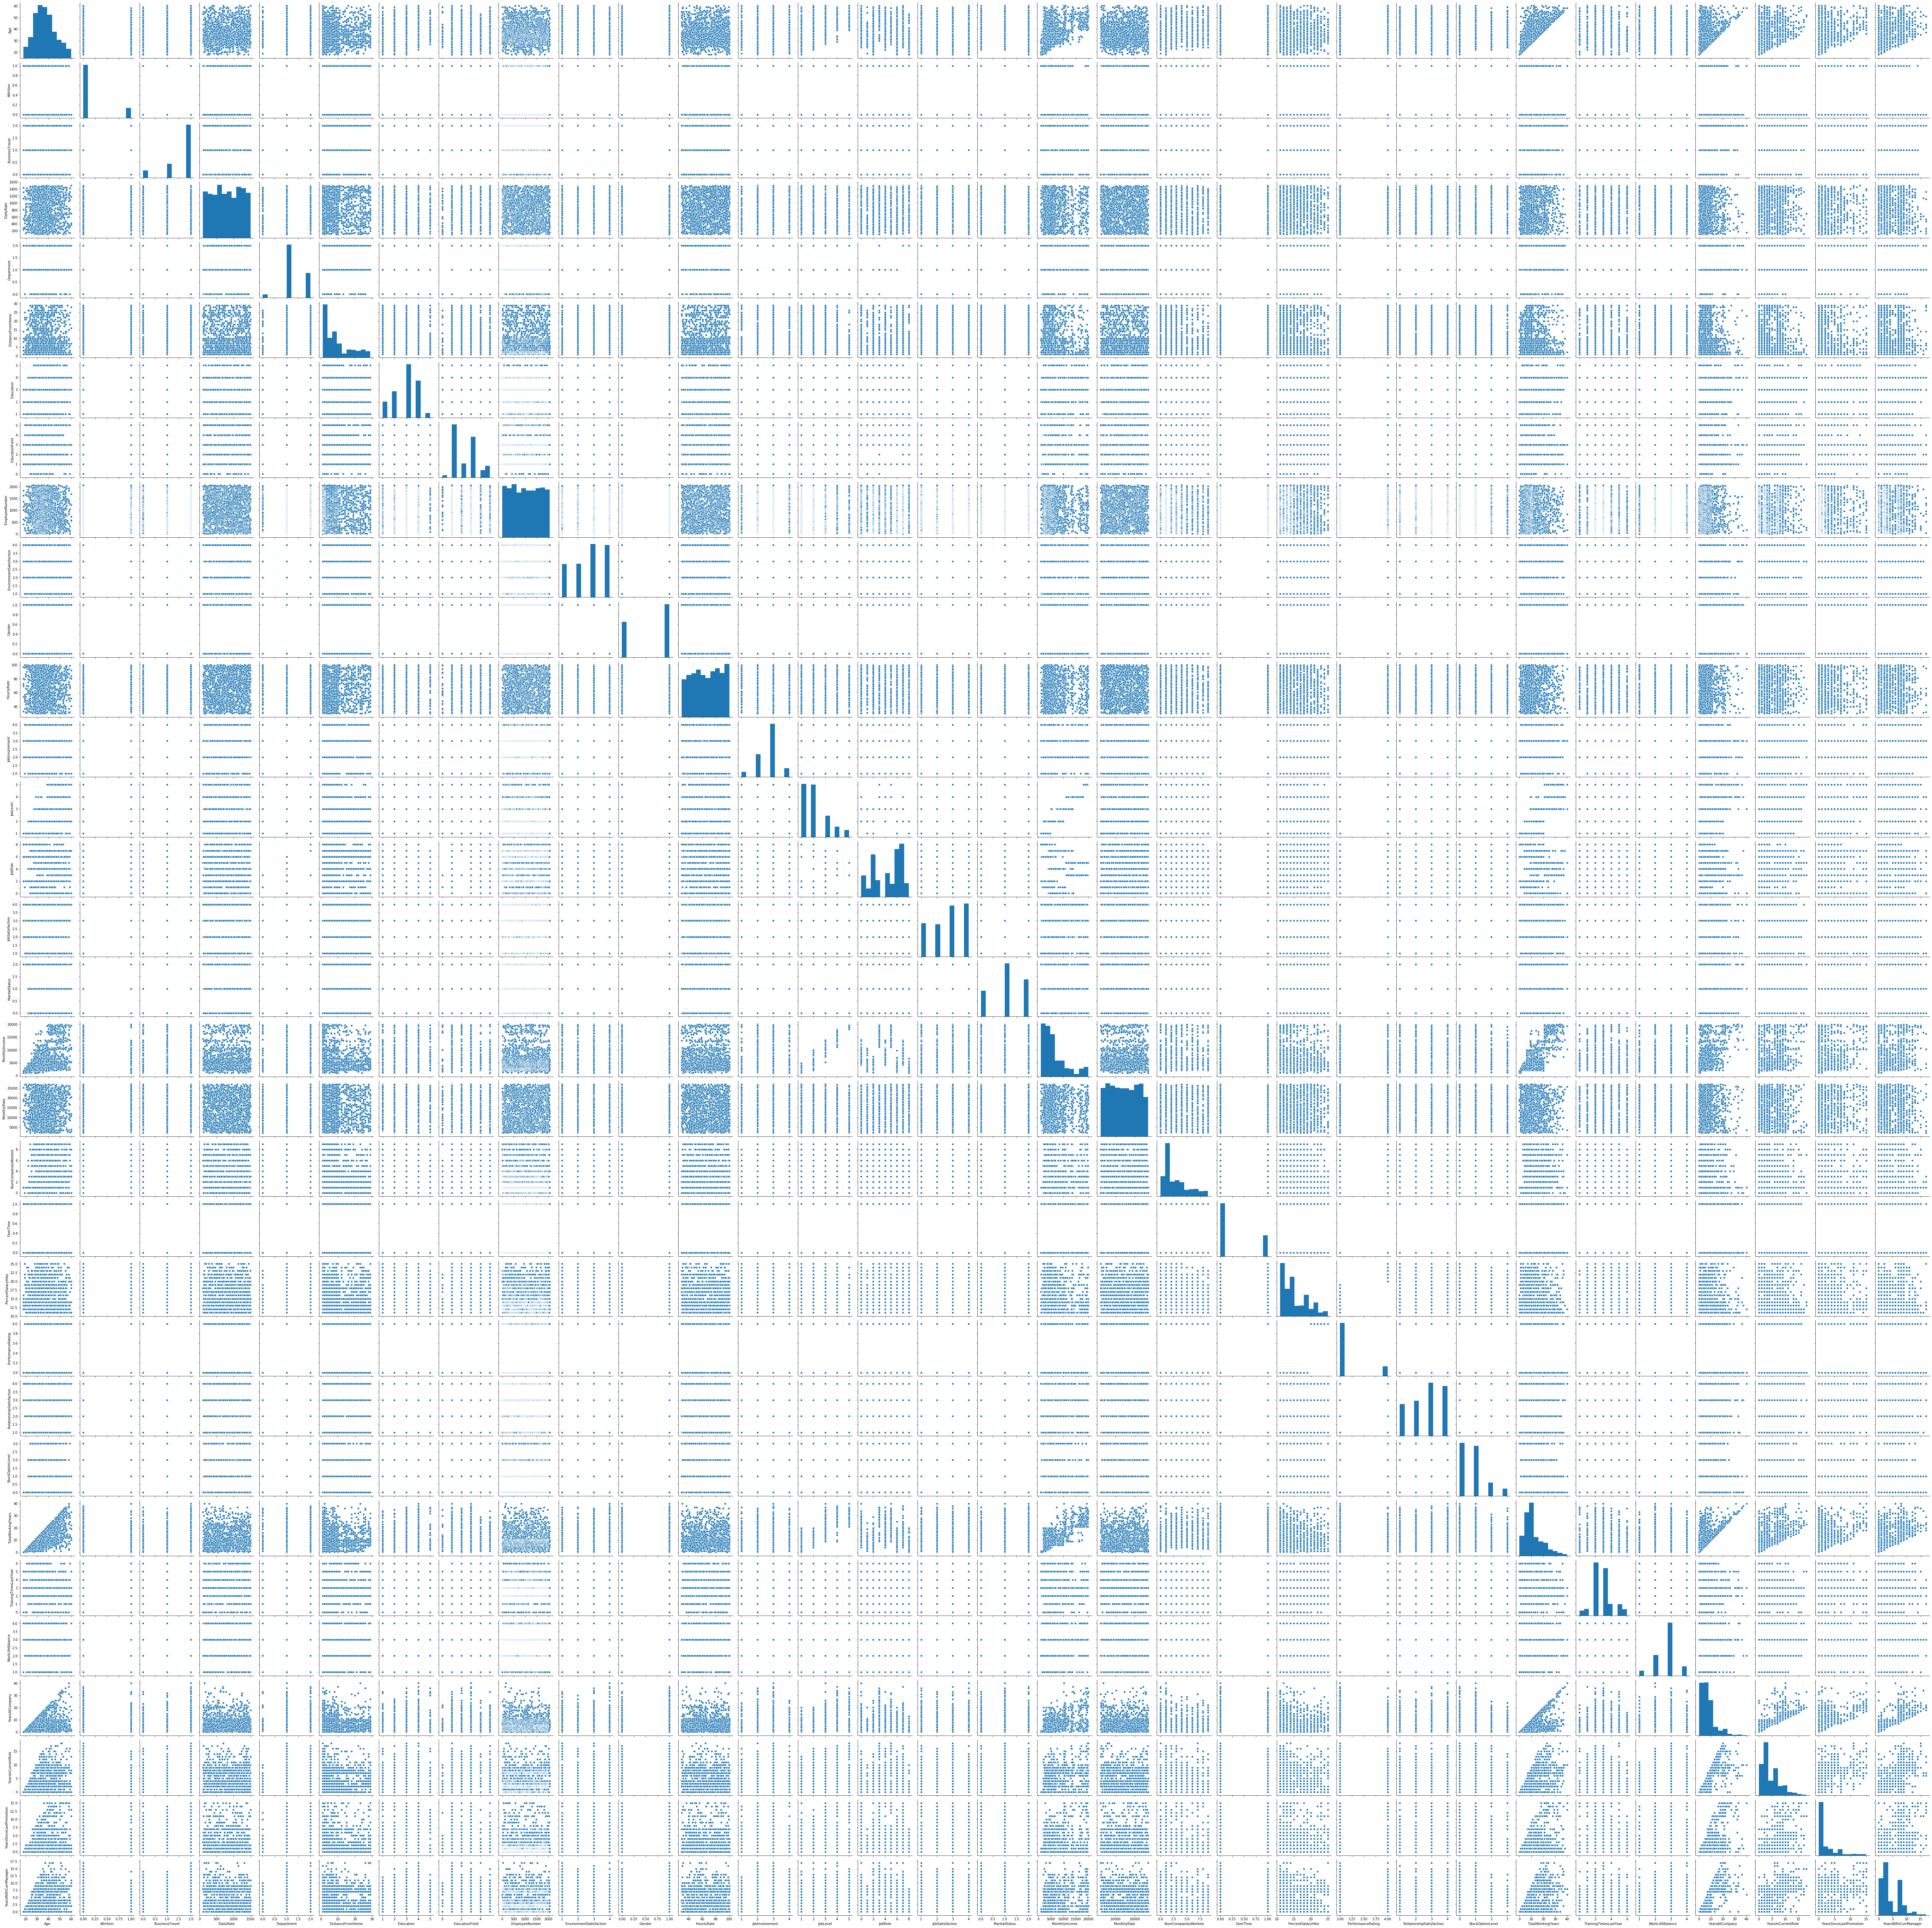

In [14]:
#Checking pairplot
sns.pairplot(dhr)

In [15]:
#Taking target variable
y=pd.DataFrame()
y['Attrition']=dhr['Attrition']
y

Attrition
0             1
1             0
2             1
3             0
4             0
...         ...
1465          0
1466          0
1467          0
1468          0
1469          0

[1470 rows x 1 columns]

In [40]:
#Taking input variable
x=dhr
dhr.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0   41               2       1102           2                 1          2   
1   49               1        279           1                 8          1   
2   37               2       1373           1                 2          2   
3   33               1       1392           1                 3          4   
4   27               2        591           1                 2          1   

   EducationField  EmployeeNumber  EnvironmentSatisfaction  Gender  ...  \
0               1               1                        2       0  ...   
1               1               2                        3       1  ...   
2               4               4                        4       1  ...   
3               1               5                        4       0  ...   
4               3               7                        1       1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 31 columns]

In [24]:
#Performing Logistic regression checking for random state value
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
max_acc_score=0
for r_state in range(40,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    y_pred=lg.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print("accuracy_score:",r_state,"is",acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
        
print(final_r_state)
print(max_acc_score)


accuracy_score: 40 is 0.8333333333333334
accuracy_score: 41 is 0.8639455782312925
accuracy_score: 42 is 0.8673469387755102
accuracy_score: 43 is 0.7857142857142857
accuracy_score: 44 is 0.8503401360544217
accuracy_score: 45 is 0.8095238095238095
accuracy_score: 46 is 0.8095238095238095
accuracy_score: 47 is 0.8401360544217688
accuracy_score: 48 is 0.8367346938775511
accuracy_score: 49 is 0.8367346938775511
accuracy_score: 50 is 0.826530612244898
accuracy_score: 51 is 0.8469387755102041
accuracy_score: 52 is 0.8605442176870748
accuracy_score: 53 is 0.8571428571428571
accuracy_score: 54 is 0.8299319727891157
accuracy_score: 55 is 0.8843537414965986
accuracy_score: 56 is 0.8367346938775511
accuracy_score: 57 is 0.8707482993197279
accuracy_score: 58 is 0.8197278911564626
accuracy_score: 59 is 0.8401360544217688
accuracy_score: 60 is 0.8299319727891157
accuracy_score: 61 is 0.8435374149659864
accuracy_score: 62 is 0.8231292517006803
accuracy_score: 63 is 0.8469387755102041
accuracy_score: 6

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
KNN=KNeighborsClassifier(n_neighbors=6)
svc=SVC()
lr=LogisticRegression(random_state=55)
dtc=DecisionTreeClassifier(random_state=6)
gnb=GaussianNB()
rf=RandomForestClassifier(n_estimators=100,random_state=55)
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dtc))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rf))
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import cross_val_score

In [38]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('*************************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("roc auc score=",roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
  

************************* KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


accuracy_score= 0.8367346938775511


Cross_val_score= 0.8353741496598641


roc auc score= 0.5065897148763889


Classification report
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       247
           1       0.33      0.02      0.04        47

    accuracy                           0.84       294
   macro avg       0.59      0.51      0.48       294
weighted avg       0.76      0.84      0.77       294



[[245   2]
 [ 46   1]]


************************* SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_st

In [39]:
#Checking all classifiers cross val score and roc_auc_score
result=pd.DataFrame({'Model': Model, 'Accuracy_score':score,'Cross_val_score':cvs,'Roc_auc_score':rocscore})
result

Model  Accuracy_score  Cross_val_score  Roc_auc_score
0    KNeighborsClassifier       83.673469        83.537415      50.658971
1                     SVC       84.013605        83.877551      50.000000
2      LogisticRegression       84.353741        84.081633      51.925230
3  DecisionTreeClassifier       79.251701        75.102041      59.225601
4              GaussianNB       75.170068        78.843537      66.271858
5  RandomForestClassifier       86.054422        85.714286      58.105780

In [ ]:
# as per the above analysis RandomForestClassifier is the perfect model
from sklearn.externals import joblib
joblib.dump(rf,'rf.hr_analytics.pkl')